### 📚 Introduction
#### Here I am in the year 2912, facing an interstellar challenge that demands all my data science skills. The Spaceship Titanic, a cutting-edge passenger liner, was on its maiden voyage to three newly habitable exoplanets when disaster struck. While passing through Alpha Centauri, the ship collided with a spacetime anomaly hidden within a dust cloud. As a result, almost half of the passengers were transported to an alternate dimension, just like the Titanic from centuries ago.
#### Now, I’m tasked with analyzing the spaceship's damaged computer records to predict which passengers were lost to the anomaly. The goal is to assist the rescue teams in recovering those passengers and changing history. It’s a big challenge, but I’m ready to use everything I’ve got to make these predictions and hopefully save the day.

#### Key Features

1. **PassengerId**: A unique identifier for each passenger. The format is `gggg_pp`, where `gggg` represents the group the passenger is traveling with and `pp` is their number within the group. Group members are often family, but not always.

2. **HomePlanet**: The planet from which the passenger departed, typically their permanent place of residence.

3. **CryoSleep**: Indicates if the passenger opted for suspended animation for the duration of the voyage. Passengers in cryosleep remain confined to their cabins.

4. **Cabin**: The cabin number where the passenger is staying, formatted as `deck/num/side`. The side can be either `P` (Port) or `S` (Starboard).

5. **Destination**: The planet where the passenger will be debarking from the spaceship.

6. **Age**: The age of the passenger.

7. **VIP**: Indicates whether the passenger has paid for VIP service during the voyage.

8. **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: The amounts billed by the passenger for each of the spaceship's luxury amenities.

9. **Name**: The full name of the passenger (first and last names).

10. **Transported**: The target variable indicating whether the passenger was transported to another dimension. This is the column you're trying to predict.


In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 📊 Dataset Overview

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.shape 

(8693, 14)

In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df.PassengerId.unique()

array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
       '9280_02'], dtype=object)

In [7]:
df.PassengerId.nunique()

8693

In [8]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [9]:
df.CryoSleep.unique()

array([False, True, nan], dtype=object)

In [10]:
df.Cabin.unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [11]:
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [12]:
df.VIP.unique()

array([False, True, nan], dtype=object)

In [13]:
df.Name.unique()

array(['Maham Ofracculy', 'Juanna Vines', 'Altark Susent', ...,
       'Fayey Connon', 'Celeon Hontichre', 'Propsh Hontichre'],
      dtype=object)

In [14]:
df.Transported.value_counts(normalize=True) 
# by looking at the value counts of the target variable, we can see that the dataset is almost balanced. so we can use any classification algorithm to train the model.

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

C:\Users\madhu\AppData\Local\Temp\ipykernel_25368\2018034694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transported', data=df, palette='Set2')


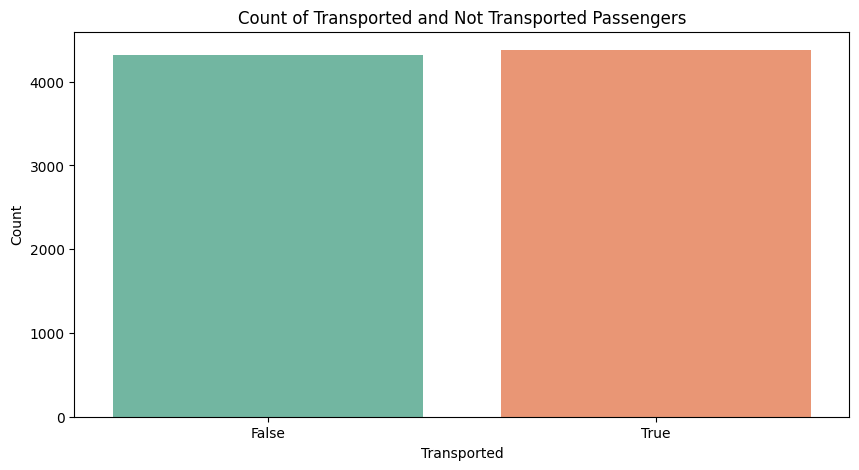

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Transported', data=df, palette='Set2')
plt.title('Count of Transported and Not Transported Passengers')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.show() 


### 🔍 Exploratory Data Analysis (EDA)

In [16]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [17]:
df.RoomService.describe() 

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

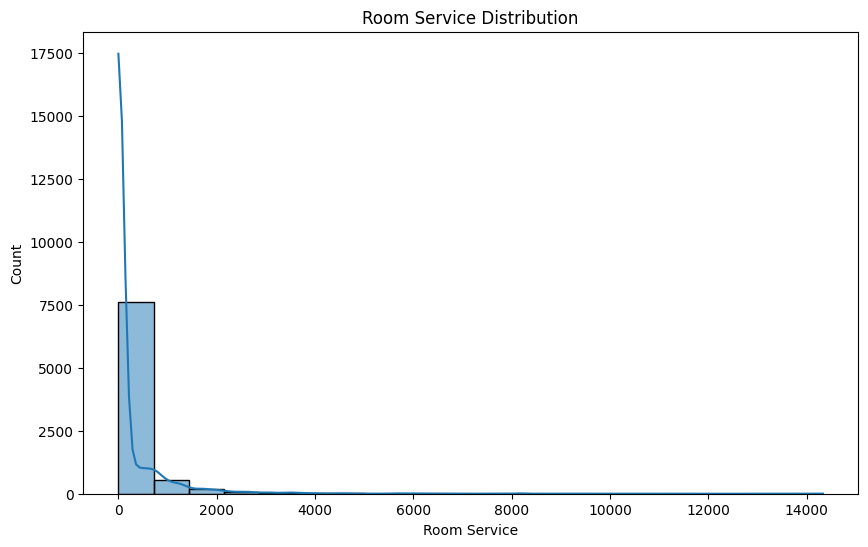

In [18]:
plt.figure(figsize=(10,6)) 
sns.histplot(df.RoomService, bins=20, kde=True) 
plt.title('Room Service Distribution')
plt.xlabel('Room Service')
plt.ylabel('Count')
plt.show() 

In [19]:
df.RoomService.value_counts(normalize=True)

RoomService
0.0       0.655193
1.0       0.013745
2.0       0.009281
3.0       0.007166
4.0       0.005522
            ...   
6899.0    0.000117
1954.0    0.000117
3146.0    0.000117
1297.0    0.000117
2555.0    0.000117
Name: proportion, Length: 1273, dtype: float64

In [20]:
df2 = df.copy()  
df2.RoomService.fillna(0)  
# I assume that nan values are the people who didn't spend on the room service   
# also we can do the same for the other spaceship's luxury amentities null values too
df2.FoodCourt.fillna(0) 
df2.ShoppingMall.fillna(0) 
df2.ShoppingMall.fillna(0) 
df2.Spa.fillna(0) 
df2.VRDeck.fillna(0) 

0          0.0
1         44.0
2         49.0
3        193.0
4          2.0
         ...  
8688      74.0
8689       0.0
8690       0.0
8691    3235.0
8692      12.0
Name: VRDeck, Length: 8693, dtype: float64

In [21]:
df.FoodCourt.value_counts(normalize=True) 

FoodCourt
0.0        0.641128
1.0        0.013631
2.0        0.008813
3.0        0.006228
4.0        0.006228
             ...   
1585.0     0.000118
749.0      0.000118
1961.0     0.000118
522.0      0.000118
14773.0    0.000118
Name: proportion, Length: 1507, dtype: float64

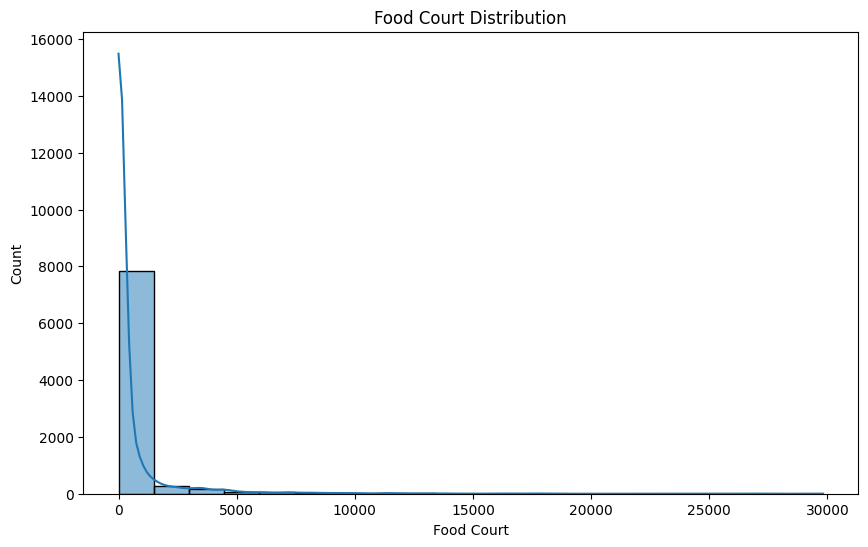

In [22]:
plt.figure(figsize=(10,6)) 
sns.histplot(df.FoodCourt, bins=20, kde=True) 
plt.title('Food Court Distribution')
plt.xlabel('Food Court')
plt.ylabel('Count')
plt.show() 

# by 

In [23]:
df2.isnull().sum()  

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [24]:
df.shape 

(8693, 14)

In [25]:
df2 = df.dropna()
df2.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [26]:
df2.shape 

(6606, 14)

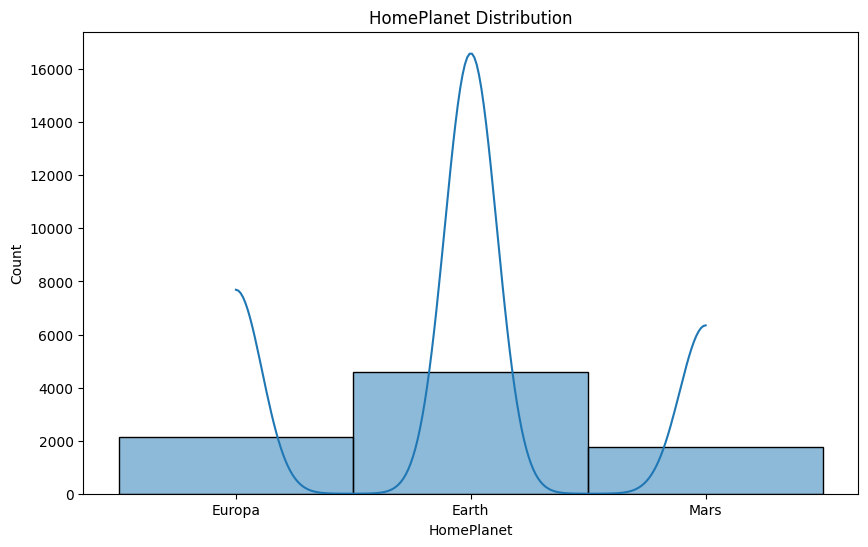

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df.HomePlanet, bins=20, kde=True)
plt.title('HomePlanet Distribution')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.show()

Text(0.5, 0.98, 'Pairplot of features coloured by Transported')

<Figure size 1000x600 with 0 Axes>

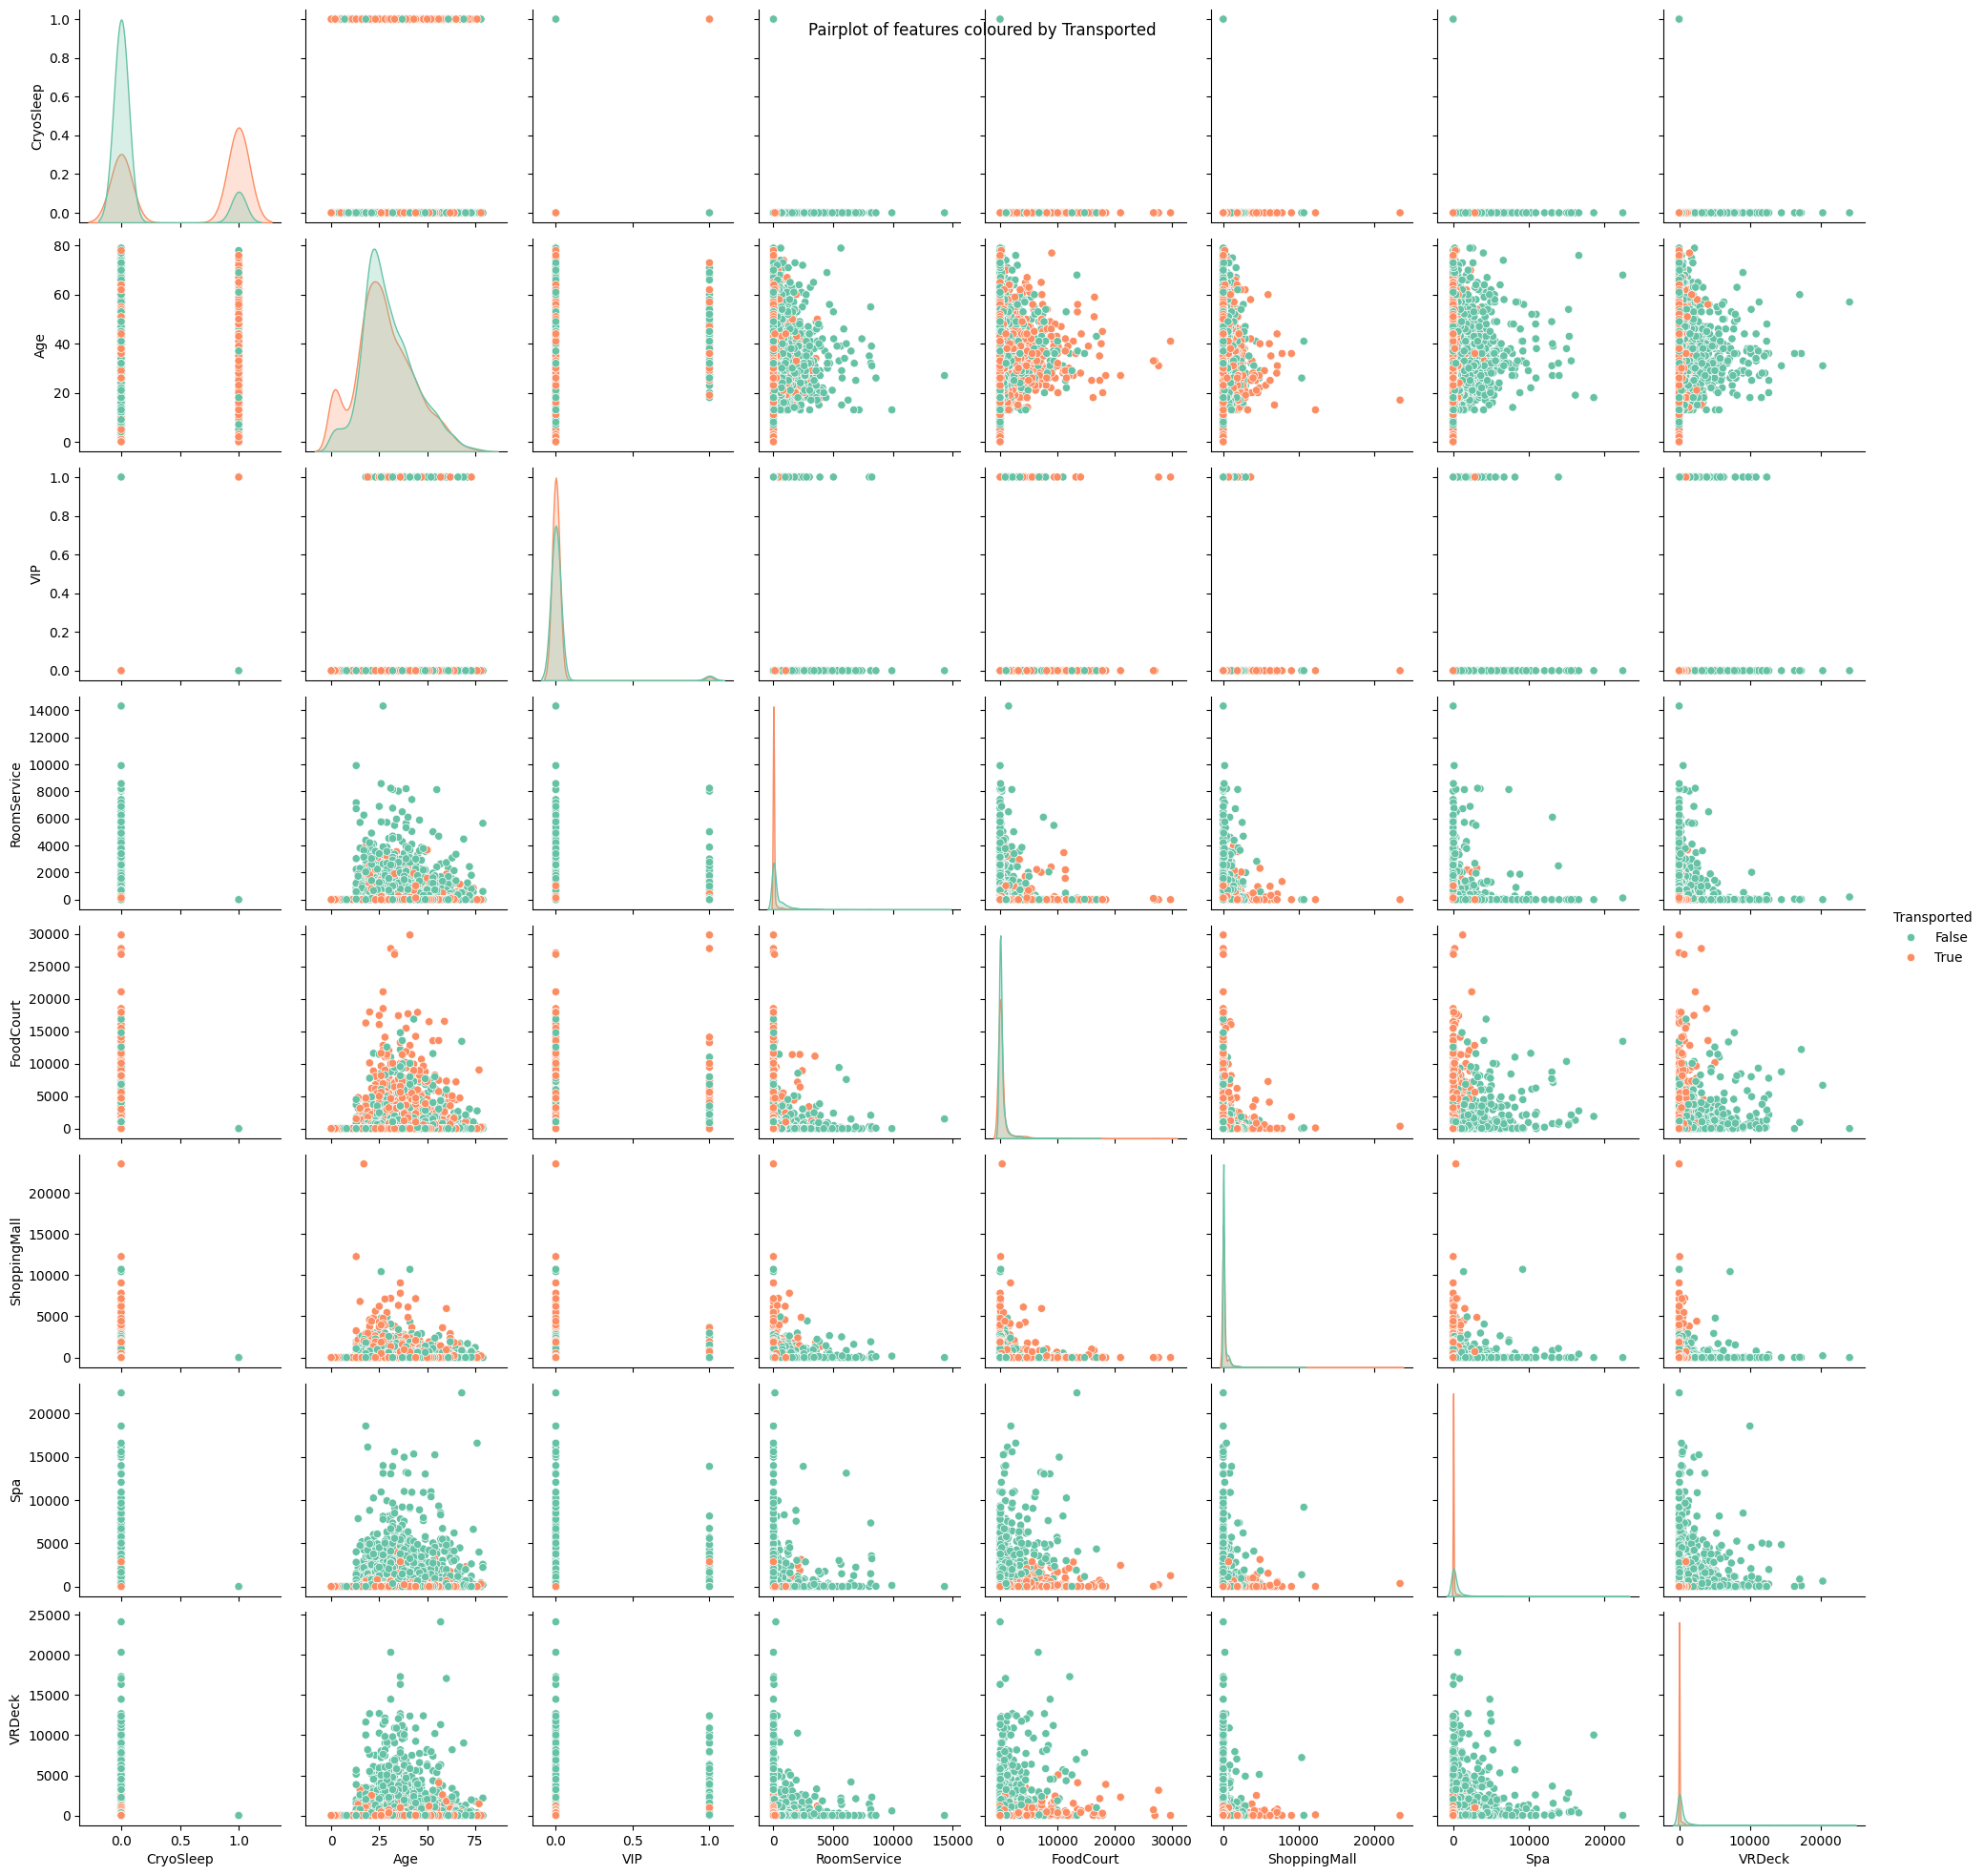

In [28]:
plt.figure(figsize=(10,6)) 
sns.pairplot(df, hue='Transported', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of features coloured by Transported') 